In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import pandas as pd
import numpy  as np

In [3]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X=iris.data[:,2:]
y=(iris['target'] == 2).astype(np.int64)

In [5]:
print(X[140],y[140])

[5.6 2.4] 1


In [6]:
svc_pipeline=Pipeline([('scaler',StandardScaler()),('svc_cls',LinearSVC(C=1,loss='hinge'))])

In [7]:
svc_pipeline.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc_cls', LinearSVC(C=1, loss='hinge'))])

In [8]:
svc_pipeline.predict([[5.5,1.7]])

array([1], dtype=int64)

In [9]:
from sklearn.svm import SVC
s=SVC()

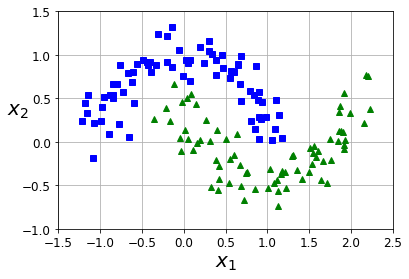

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=150, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [11]:
from sklearn.datasets import make_moons

In [12]:
X,y=make_moons(n_samples=150)

In [13]:
X[:5]

array([[9.01033795e-04, 4.57558797e-01],
       [7.21956094e-01, 6.91938869e-01],
       [4.38332653e-02, 2.07177229e-01],
       [3.22670531e-02, 2.48021939e-01],
       [1.96773295e+00, 2.48021939e-01]])

In [14]:
len(X)

150

In [15]:
y[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_svc=Pipeline([('poly',PolynomialFeatures(degree=3)),
                   ('sclaer',StandardScaler()),
                   ('svc-cls',LinearSVC(C=10,loss='hinge'))])

In [17]:
poly_svc.fit(X,y)

C:\Users\91868\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('sclaer', StandardScaler()),
                ('svc-cls', LinearSVC(C=10, loss='hinge'))])

In [18]:
poly_svc.predict([[0.4,1]])

array([0], dtype=int64)

In [19]:
poly_svc.predict([[0.4,0.1]])

array([1], dtype=int64)

### polnomial kernal

In [20]:
from sklearn.svm import SVC

In [21]:
poly_kernel_cls=Pipeline([('sclaer',StandardScaler()),('svc_cls',SVC(kernel='poly',degree=3,coef0=1,C=5))])

In [22]:
poly_kernel_cls.fit(X,y)

Pipeline(steps=[('sclaer', StandardScaler()),
                ('svc_cls', SVC(C=5, coef0=1, kernel='poly'))])

In [23]:
poly_kernel_cls.predict([[0.5,1.4]])

array([0], dtype=int64)

In [24]:
rbf_kernel_cls=Pipeline([('sclaer',StandardScaler()),('svc_cls',SVC(kernel='rbf',gamma=5,C=0.001))])

In [25]:
rbf_kernel_cls.fit(X,y)

Pipeline(steps=[('sclaer', StandardScaler()),
                ('svc_cls', SVC(C=0.001, gamma=5))])

In [26]:
rbf_kernel_cls.predict([[0.5,1.4]])

array([0], dtype=int64)

## SVM regression

In [27]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [28]:
from sklearn.svm import SVR

In [29]:
svm_reg_poly=SVR(kernel='poly',degree=2,C=100,epsilon=0.1)

In [30]:
svm_reg_poly.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

In [31]:
"""Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model."""


'Train a LinearSVC on a linearly separable dataset. Then train an SVC and a\nSGDClassifier on the same dataset. See if you can get them to produce roughly\nthe same model.'

In [32]:
from sklearn.datasets import load_iris
X=iris.data[:,2:]

In [33]:
y=(iris.target==2).astype(np.int64)

In [36]:
from sklearn.svm import LinearSVC , SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [39]:
Xnew=scaler.fit_transform(X)

In [71]:
c=5
alpha=1/(len(X)*c)
lin_svc=LinearSVC(loss='hinge',C=c,random_state=42)
svc=SVC(C=c,kernel='linear')
sgd=SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

In [72]:
lin_svc.fit(X,y)
svc.fit(X,y)
sgd.fit(X,y)

C:\Users\91868\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SGDClassifier(alpha=0.0013333333333333333, eta0=0.001, learning_rate='constant',
              random_state=42)

In [73]:
print(lin_svc.intercept_,lin_svc.coef_)
print(svc.intercept_,svc.coef_)
print(sgd.intercept_,sgd.coef_)

[-8.32316156] [[0.51124866 3.51449489]]
[-17.90013586] [[2.5000262 3.5      ]]
[-2.463] [[0.01110619 1.50825492]]
